In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def plot_stuff(df):
    fig, axs = plt.subplots(2, 1, figsize=(8, 5))
    
    # Plotting rates
    for i, column in enumerate(['RateRoll', 'RatePitch', 'RateYaw']):
        axs[0].plot(df['Timestamp'], df[column], label=column)
    axs[0].set_title('Rates')
    axs[0].set_xlabel('Timestamp')
    axs[0].set_ylabel('Rates')
    axs[0].set_ylim(-100, 100)
    axs[0].legend()
    
    # Plotting accelerations
    for i, column in enumerate(['AccX', 'AccY', 'AccZ', 'brake']):
        axs[1].plot(df['Timestamp'], df[column], label=column)
    axs[1].set_title('Accelerations')
    axs[1].set_xlabel('Timestamp')
    axs[1].set_ylabel('Accelerations')
    # axs[1].set_ylim(-8, 8)
    axs[1].legend()
    
    plt.tight_layout()
    plt.show() 

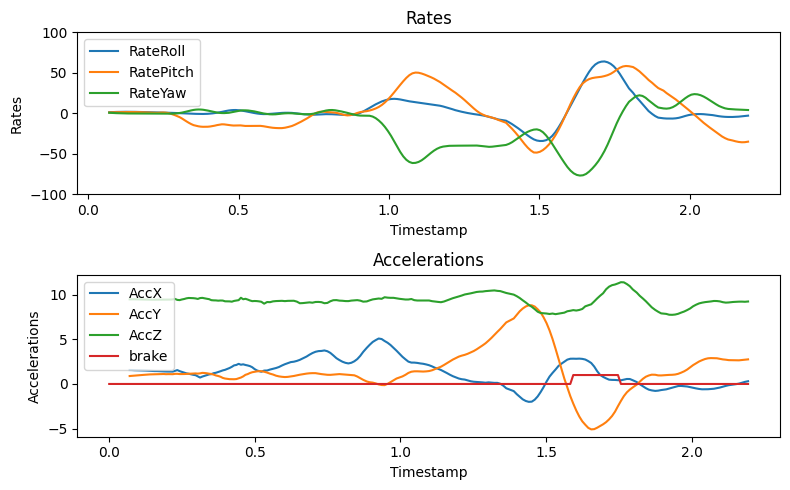

In [23]:
df = pd.read_csv('data1731979563.csv', names=['Timestamp', 'RateRoll', 'RatePitch', 'RateYaw', 'AccX', 'AccY', 'AccZ'], header=None)
df['Timestamp'] -= df['Timestamp'][0]

# smooth out all columns
for column in ['RateRoll', 'RatePitch', 'RateYaw', 'AccX', 'AccY', 'AccZ']:
    df[column] = df[column].rolling(window=10).mean()

df['brake'] = df['AccY'] < - 2 # note accy is inverted

plot_stuff(df)

# Trials
- Straight line (slow speed) (gentle braking)
- Straight line (fast speed) (gentle braking)
- Straight line (slow speed) (medium braking)
- Straight line (fast speed) (medium braking)
- Downhill (slow speed) (gentle braking)
- Downhill (slow speed) (medium braking)
- Uphill (slow speed) (no braking)
- Uphill (fast speed) (no braking)
- Slow left turn flat ground
- Slow right turn flat ground
- Fast left turn flat ground
- Fast right turn flat ground





